## How to perform sentiment analysis using python ?

In [1]:
#We will first start with listing out the rquirements and then writing the code.

In [2]:
### Requirements
#Python Libraries - >

    #1. numpy: ‘NumPy’ allows us to work with arrays.
    #2. tweepy: ‘Tweepy’ allows us to access Twitter API.
    #3. textblob: ‘TextBlob’ allows us to process textual data for NLP.
    #4. matplotlib.pyplot: ‘Matplotlib’ allows us to visualize data in multiple ways.
    #5. pandas: ‘Pandas’ is used to work with data to analyze it.
    #6. wordcloud: ‘Wordcloud’ allows us to generate a word cloud in Python for visualization.
    #7. better_profanity: ‘Better-Profanity’ allows us to censor data.


In [3]:
import numpy as np
import tweepy 
from tweepy import OAuthHandler 
from textblob import TextBlob 
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud
from better_profanity import profanity

In [4]:
consumer_key = 'xxxxxxxxxxxxxxxxxx'
consumer_secret = 'xxxxxxxxxxxxxxxxxx'
access_token = 'xxxxxxxxxxxxxxxxxx'
access_token_secret = 'xxxxxxxxxxxxxxxxxx'

In [5]:
auth = tweepy.OAuth1UserHandler(
   consumer_key, consumer_secret, access_token, access_token_secret
)

In [6]:
api = tweepy.API(auth) #authenticating 

In [7]:
# asking the user for keywords of interest 
query = input("what are you interested in knowing about ? ")

what are you interested in knowing about ? kl rahul


In [8]:
 #filetering the query to remove retweets 
filtered_query = query + "-filter:retweets"
tweets = tweepy.Cursor(api.search_tweets,q=filtered_query,lang="en").items(1000)
list1 = [[tweet.text, tweet.user.screen_name, tweet.user.location] for tweet in tweets]

In [9]:
# new data frame object which containes required information 
new_tweet_data = pd.DataFrame(data = list1,columns=['Tweet','User', "location"])

In [10]:
#converting only tweets data to a list for further processig 
tweet_list = new_tweet_data.Tweet.to_list()

In [11]:
#the below function cleans the tweets.It Removes profanity, unnecessary characters, spaces, and stopwords.

def clean_tweet(tweet):
    import re
    if type(tweet) == float:
        return ""
    r = tweet.lower()
    r = profanity.censor(r)
    r = re.sub("'", "", r) # This is to avoid removing contractions in english
    r = re.sub("@[A-Za-z0-9_]+","", r)
    r = re.sub("#[A-Za-z0-9_]+","", r)
    r = re.sub(r'http\S+', '', r)
    r = re.sub('[()!?]', ' ', r)
    r = re.sub('\[.*?\]',' ', r)
    r = re.sub("[^a-z0-9]"," ", r)
    r = r.split()
    stopwords = ["for", "on", "an", "a", "of", "and", "in", "the", "to", "from"]
    r = [w for w in r if not w in stopwords]
    r = " ".join(word for word in r)
    return r

In [12]:
cleaned = [clean_tweet(tweet) for tweet in tweet_list]

In [13]:
# Define the sentiment objects using TextBlob
sentiment_objects = [TextBlob(tweet) for tweet in cleaned]

In [14]:
# Create a list of polarity values and tweet text

sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

In [15]:
sentiment_values[0:10]

[[-0.25,
  'kl rahul amp sharma are worst opener this tournament even zimbabwe has better opening partnership than india'],
 [0.0, 'im not talking about kl rahul anywhere my tweet'],
 [-0.4,
  'how except sa game atleast two batsmen have scored well against all others vk hp against'],
 [0.4, 'where do you fit kl rahuls miraculous throw run litton das out'],
 [-0.22499999999999992,
  'power play is power hitter kl rahul badly damages first six overs requirement check his position batting'],
 [0.0, 'kl rahul it was opportunity me stand up'],
 [-0.4000000000000001,
  'so so false virat always backed kl rahul go watch kl rahul interview talking abt how kohli'],
 [-0.06666666666666665,
  'dude litton was not running outfield but pitch which was dry hea'],
 [0.225, 'kl rahul said if i can do what team wants me i sleep peacefully'],
 [0.0, 'kl rahul has hit 23 fours 23 sixes t20i this year equal number fours']]

In [16]:
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

In [17]:
sentiment_df.head(10)

,polarity,tweet
0,-0.250000,kl rahul amp sharma are worst opener this tour...
1,0.000000,im not talking about kl rahul anywhere my tweet
2,-0.400000,how except sa game atleast two batsmen have sc...
3,0.400000,where do you fit kl rahuls miraculous throw ru...
4,-0.225000,power play is power hitter kl rahul badly dama...
5,0.000000,kl rahul it was opportunity me stand up
6,-0.400000,so so false virat always backed kl rahul go wa...
7,-0.066667,dude litton was not running outfield but pitch...
8,0.225000,kl rahul said if i can do what team wants me i...
9,0.000000,kl rahul has hit 23 fours 23 sixes t20i this y...


In [18]:
# Save the polarity column as 'n'.

n=sentiment_df["polarity"]

# Convert this column into a series, 'm'. 

m=pd.Series(n)

In [19]:
# Initialize variables, 'pos', 'neg', 'neu'.

pos=0
neg=0
neu=0

# Create a loop to classify the tweets as Positive, Negative, or Neutral.
# Count the number of each.

for items in m:
    if items>0:
        pos=pos+1
    elif items<0:
        neg=neg+1
    else:
        neu=neu+1

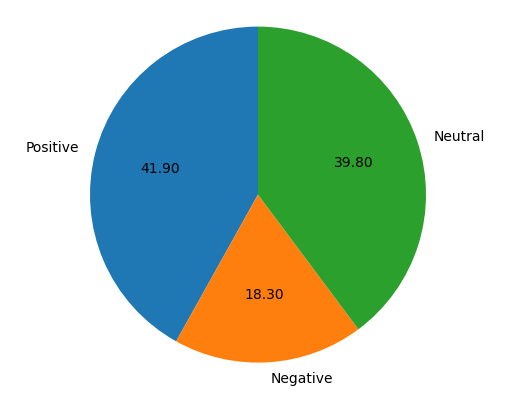

In [20]:
pieLabels=["Positive","Negative","Neutral"]

populationShare=[pos,neg,neu] #variables declared above 

figureObject, axesObject = plt.subplots()

axesObject.pie(populationShare,labels=pieLabels,autopct='%1.2f',startangle=90)

axesObject.axis('equal')

plt.show()

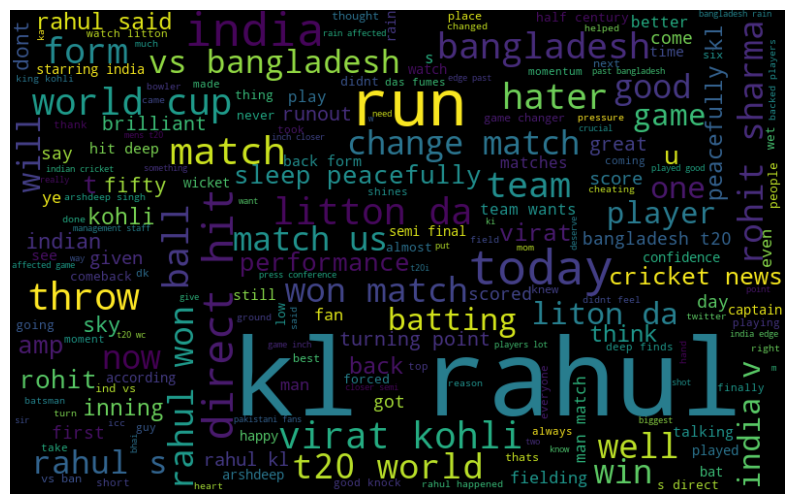

In [21]:
all_words = ' '.join([text for text in cleaned])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()